In [5]:
import pandas as pd
import seaborn
data = pd.read_csv('uber-raw-data-apr14.csv')
data_c = data.copy()
data_c['Date/Time']=data_c['Date/Time'].map(pd.to_datetime)
data_c.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


# Understanding Data


In [6]:
data_c.shape

(564516, 4)

In [7]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


In [9]:
def get_dom(data):
    return data.day

In [10]:
data_c['dom']=data_c['Date/Time'].map(get_dom)

In [70]:
def get_weekday(data):
    return data.weekday()


In [71]:
data_c['weekday']=data_c['Date/Time'].map(get_weekday)

In [14]:
def get_hour(data):
    return data.hour

In [15]:
data_c['hour']=data_c['Date/Time'].map(get_hour)

# Analysis

## Analyzing DOM

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

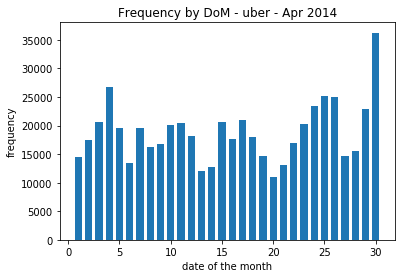

In [27]:
hist(data_c.dom,bins=30,range=(0.5,30.5),rwidth=0.7)
xlabel ('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')

In [31]:
def count_rows(rows):
    return len(rows)
by_date = data_c.groupby('dom').apply(count_rows)

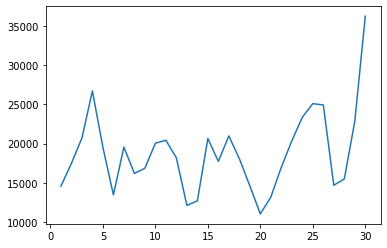

In [32]:
plot(by_date)

In [33]:
by_date_sorted= by_date.sort_values()

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

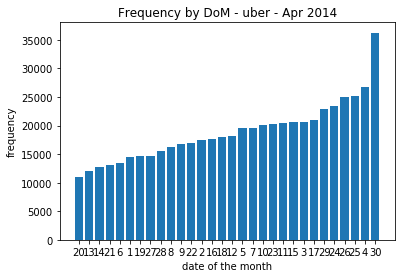

In [40]:
bar(range(1, 31), by_date_sorted)
xticks(range(1,31),by_date_sorted.index)
;
xlabel ('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')

## analyze the hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

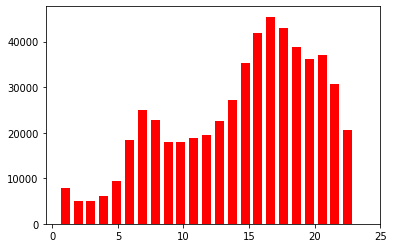

In [57]:
hist(data_c.hour,rwidth = 0.7, bins=24, range=(0.5,24),color='red')

In [46]:
by_hour = data_c.groupby('hour').apply(count_rows)

In [47]:
by_hour_sorted = by_hour.sort_values()

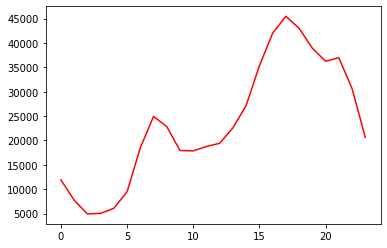

In [58]:
plot(by_hour,color='red')

## cross analyze hour and dom

In [68]:
by_cross = data_c.groupby('dom hour'.split()).apply(count_rows).unstack()

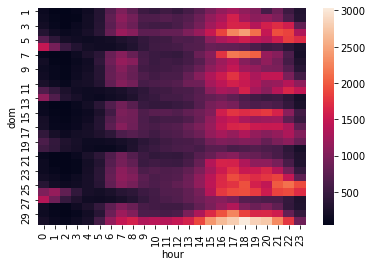

In [69]:
seaborn.heatmap(by_cross)

## analyze the weekday

''

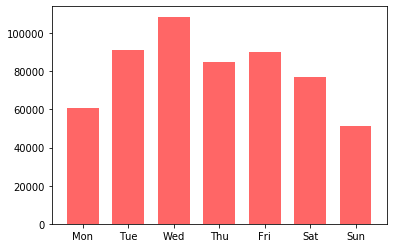

In [81]:
hist(data_c.weekday,bins=7, rwidth = 0.7,range=(-0.5,6.5),alpha=0.6,color='red')
xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())
;

## analyze the cross weekday and hour

In [85]:
by_w_h = data_c.groupby('weekday hour'.split()).apply(count_rows).unstack()

In [86]:
by_w_h

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


''

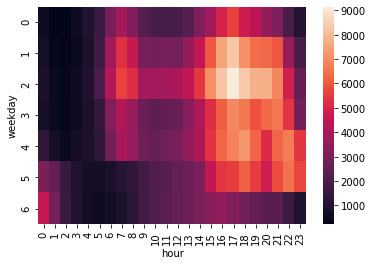

In [88]:
seaborn.heatmap(by_w_h)
;